<a href="https://colab.research.google.com/github/bagasdal/bagasdal/blob/main/face_recognition_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face Recognition


Bagas Daliyanto

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# access the library
!python3 -m pip install -r "/content/drive/My Drive/Tubes DSKC 2020 - FR/Tubes Face Recognition/requirements.txt"

In [ ]:
import pandas as pd

## Directory dataset
dir_trainset = "/content/drive/My Drive/Tubes DSKC 2020 - FR/Tubes Face Recognition/dataset/trainset.csv"  # Dataset for Training 
dir_validset = "/content/drive/My Drive/Tubes DSKC 2020 - FR/Tubes Face Recognition/dataset/validset.csv"  # Dataset for Validation 
dir_testset = "/content/drive/My Drive/Tubes DSKC 2020 - FR/Tubes Face Recognition/dataset/testset.csv"    # Dataset for Testing

## read dataset
train_pd = pd.read_csv(dir_trainset, index_col=0)
valid_pd = pd.read_csv(dir_validset, index_col=0)
test_pd = pd.read_csv(dir_testset, index_col=0)

print('trainset, validset & testset berhasil dibaca!')

trainset, validset & testset berhasil dibaca!


In [ ]:
## check dataset
train_pd[:10]

,feature-0,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10,feature-11,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19,feature-20,feature-21,feature-22,feature-23,feature-24,feature-25,feature-26,feature-27,feature-28,feature-29,feature-30,feature-31,feature-32,feature-33,feature-34,feature-35,feature-36,feature-37,feature-38,feature-39,...,feature-473,feature-474,feature-475,feature-476,feature-477,feature-478,feature-479,feature-480,feature-481,feature-482,feature-483,feature-484,feature-485,feature-486,feature-487,feature-488,feature-489,feature-490,feature-491,feature-492,feature-493,feature-494,feature-495,feature-496,feature-497,feature-498,feature-499,feature-500,feature-501,feature-502,feature-503,feature-504,feature-505,feature-506,feature-507,feature-508,feature-509,feature-510,feature-511,person_id
0,0.007336,0.008595,0.068958,0.056461,-0.084156,0.033723,0.008896,0.031503,0.003729,0.063417,-0.084111,0.050679,-0.052592,-0.024113,0.022935,0.062147,0.007797,-0.013729,-0.024085,0.048144,0.047664,0.007134,0.029242,0.018315,-0.025314,0.020141,0.019823,0.046273,0.081706,-0.066695,-0.030832,-0.056677,0.023888,0.059255,-0.021196,0.037244,0.053448,0.012472,-0.063784,-0.053871,...,0.011167,-0.058554,0.011198,0.003120,0.001231,0.060154,-0.014994,-0.064707,0.024590,0.057210,-0.009016,0.005777,-0.058466,-0.024977,0.029502,-0.075783,-0.030384,0.056633,0.042162,-0.044850,0.015871,-0.041289,-0.032993,0.022899,-0.035855,0.045617,-0.001689,0.036367,-0.019787,-0.087974,-0.066135,0.005970,-0.038453,0.001771,0.079099,0.019221,-0.026182,-0.071137,-0.002375,1-1
1,0.015086,-0.003008,0.047025,0.032434,-0.081811,0.017877,0.002261,0.041208,-0.024354,0.026385,-0.049998,0.035323,-0.028618,-0.032322,0.096713,0.048548,0.008948,-0.027040,-0.003939,0.037334,0.031234,0.002051,0.026846,-0.003286,-0.017039,0.030333,0.014398,0.063963,0.130749,-0.020731,0.000086,-0.055897,0.031268,0.027016,-0.012907,0.015474,0.075594,0.017101,-0.077749,-0.044414,...,0.003157,-0.018046,0.010786,0.004088,-0.031540,0.032276,-0.006400,-0.057574,0.045908,0.061996,-0.005074,-0.005571,-0.048904,-0.036393,0.017483,-0.053534,-0.088018,0.050181,0.028860,-0.015588,0.025268,-0.048714,-0.034098,0.005307,-0.063442,0.035149,-0.005413,0.040801,0.028646,-0.064141,-0.015013,0.051359,-0.033380,0.016916,0.069442,-0.010372,0.003045,-0.069003,-0.006235,1-1
2,0.015934,0.015473,0.070109,0.050137,-0.072415,0.052197,0.024562,0.034938,0.001563,0.080846,-0.073210,0.041037,-0.043405,-0.017316,0.047076,0.075693,0.011038,-0.001372,-0.035217,0.044355,0.006093,0.028717,0.032555,0.012511,-0.021797,0.047591,0.034767,0.061034,0.065991,-0.030121,-0.007236,-0.074119,0.035410,0.054600,-0.019611,0.027202,0.049522,0.018424,-0.060533,-0.032707,...,-0.003998,-0.044014,0.010222,0.039924,-0.037049,0.023834,-0.002685,-0.061085,0.033221,0.049653,-0.025346,0.011778,-0.023505,-0.041397,0.060621,-0.071955,-0.016078,0.062588,0.050202,-0.057954,0.027156,-0.051778,-0.009342,0.033265,-0.032251,0.024560,-0.009300,0.033001,0.003487,-0.097932,-0.044977,0.012908,-0.031884,0.017296,0.071215,-0.001534,-0.028464,-0.046038,-0.038910,1-1
3,-0.003318,0.016053,0.077125,0.041617,-0.077971,0.027392,0.011004,0.078127,-0.005446,0.048533,-0.047585,0.026525,0.014666,-0.047977,0.085337,0.030867,0.004764,0.009743,-0.055114,0.040001,-0.011619,0.031830,0.046073,0.040624,-0.017705,0.043546,0.026480,0.032454,0.130593,-0.035291,-0.018711,-0.105348,0.018644,0.063172,-0.039804,-0.002651,0.056399,0.045174,-0.104352,-0.075927,...,0.002209,-0.085003,-0.009745,0.002889,0.006705,0.054548,-0.012472,-0.068458,0.010115,-0.025668,-0.024864,0.011832,-0.000832,-0.040713,0.058829,-0.014479,-0.026962,0.037673,0.009607,-0.066482,-0.031816,-0.062165,-0.035253,-0.015332,-0.010761,0.039918,-0.010863,0.012051,-0.015856,-0.076023,-0.009593,0.042208,-0.011924,-0.031368,0.103672,-0.028327,-0.060657,-0.034763,-0.008891,1-1
4,0.010949,-0.001085,0.040895,0.040264,-0.102653,0.011109,

In [ ]:
from sklearn.utils import shuffle

## shuffle dataset
train_pd = shuffle(train_pd, random_state=0) 
valid_pd = shuffle(valid_pd, random_state=0)
test_pd = shuffle(test_pd, random_state=0)

In [ ]:
import numpy as np

## convert to numpy array
train = train_pd.values
print('trainingset')
print(train[:5,:5])

valid = valid_pd.values
print('\nvalidset')
print(valid[:5,:5])

test = test_pd.values
print('\ntestset')
print(test[:5,:5])

trainingset
[[0.09675294 -0.007129568 0.01872267 -0.03755979 0.0072917636]
 [0.0069418503 0.026133416 0.025605485 0.013701153999999998
  -0.041643097999999996]
 [0.03774616 -0.04237995 -0.01732057 0.010699344 -0.017181898]
 [0.009204663 -0.022634802000000002 -0.003758291 -0.010571986 0.033118896]
 [-0.03304074 0.013028273 -0.008919557 0.0047436673 -0.023656838]]

validset
[[-0.027640441 -0.081025876 0.07277135 0.07154014 -0.043485038]
 [0.037357435 -0.02822189 -0.010329870500000001 0.040690437 -0.08691494]
 [0.06603766 -0.015809022 0.0092522465 0.052806200000000005 0.036406923]
 [0.047070775 0.028603467999999996 0.043580845 -0.023848143999999998
  -0.08909446]
 [-0.06534964 0.10766278 -0.05758333 -0.04730877 -0.0229164]]

testset
[[0.05281942 0.009888512 0.019956368999999998 0.0015447659
  0.0065599735999999995]
 [-0.055891853 -0.027679356000000002 -0.04245580400000001 -0.03771259
  0.03271291]
 [0.039349347 0.04950273400000001 0.051937073 0.022633454 -0.11991767]
 [0.03722895 -0.06137

In [ ]:

# Trainingset
X_train = train[:16700,:512]
y_train = train[:16700,512].reshape(X_train.shape[0],-1)
print('Dimensi matriks trainset')
print('fitur: '+ str(X_train.shape))
print('label: '+ str(y_train.shape))
y_train2 =y_train

# Validset
X_valid = valid[:1161,:512]
y_valid = valid[:1161,512].reshape(X_valid.shape[0],-1)
print('\nDimensi matriks validset')
print('fitur: '+ str(X_valid.shape))
print('label: '+ str(y_valid.shape))

# Testset
X_test = test[:1200,:512]
y_test = test[:1200,512].reshape(X_test.shape[0],-1)
print('\nDimensi matriks testset')
print('fitur: '+ str(X_test.shape))
print('label: '+ str(y_test.shape))

Dimensi matriks trainset
fitur: (16700, 512)
label: (16700, 1)

Dimensi matriks validset
fitur: (1161, 512)
label: (1161, 1)

Dimensi matriks testset
fitur: (1200, 512)
label: (1200, 1)


In [ ]:
from sklearn import preprocessing

# process data

lc = preprocessing.LabelBinarizer()
lc.fit(y_train)

y_train = lc.transform(y_train) # Label untuk traningset
y_valid = lc.transform(y_valid) # Label untuk validset
y_test = lc.transform(y_test) # Label untuk testset

print('Dimensi label setelah one-hot-encoding')
print('train: ' + str(y_train.shape))
print('valid: ' + str(y_valid.shape))
print('test : ' + str(y_test.shape))

Dimensi label setelah one-hot-encoding
train: (16700, 200)
valid: (1161, 200)
test : (1200, 200)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input

dimensi_input = 512
hidden_layer_1 = 512 
hidden_layer_2 = 512 
output_layer = 200    
drop_prob = 0.7     

## define model
model = Sequential(
    [
        Dense(hidden_layer_1, activation="relu", name="layer1", input_shape=(dimensi_input,)),
        Dropout(drop_prob),
        Dense(hidden_layer_2, activation="relu", name="layer2"),
        Dropout(drop_prob),
        Dense(output_layer, activation="softmax", name="layer3"),
    ]
)

## display model
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
layer2 (Dense)               (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
layer3 (Dense)               (None, 200)               102600    
Total params: 627,912
Trainable params: 627,912
Non-trainable params: 0
_________________________________________________________________


In [ ]:
learning_rate = 0.0001
batch_size = 128
epoch = 20

In [ ]:
from keras.optimizers import Adam

## Define loss function

optimizer = Adam(learning_rate= learning_rate)

model.compile(loss= 'categorical_crossentropy' , optimizer= optimizer , metrics=[ 'accuracy' ])

In [ ]:
## Train Model
history = model.fit(X_train, y_train, epochs=epoch, verbose=1, batch_size=batch_size, validation_data=(X_valid, y_valid))

Train on 16700 samples, validate on 1161 samples
Epoch 1/20
16700/16700 [==============================] - 6s 349us/step - loss: 3.6308 - accuracy: 0.3541 - val_loss: 3.3565 - val_accuracy: 0.8932
Epoch 2/20
16700/16700 [==============================] - 6s 347us/step - loss: 3.1599 - accuracy: 0.4307 - val_loss: 2.8251 - val_accuracy: 0.9208
Epoch 3/20
16700/16700 [==============================] - 6s 347us/step - loss: 2.7112 - accuracy: 0.5022 - val_loss: 2.3405 - val_accuracy: 0.9388
Epoch 4/20
16700/16700 [==============================] - 6s 346us/step - loss: 2.3016 - accuracy: 0.5749 - val_loss: 1.9113 - val_accuracy: 0.9475
Epoch 5/20
16700/16700 [==============================] - 6s 348us/step - loss: 1.9621 - accuracy: 0.6308 - val_loss: 1.5590 - val_accuracy: 0.9440
Epoch 6/20
16700/16700 [==============================] - 6s 346us/step - loss: 1.6801 - accuracy: 0.6802 - val_loss: 1.2803 - val_accuracy: 0.9423
Epoch 7/20
16700/16700 [==============================] - 6s 35

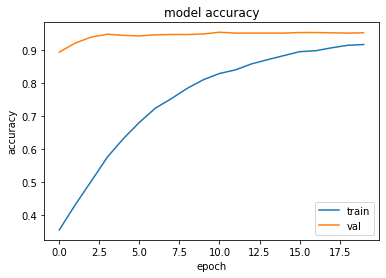

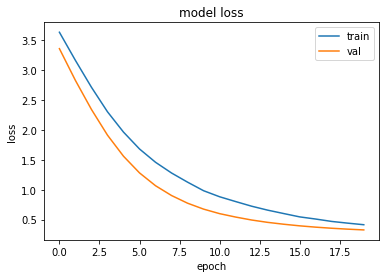

In [ ]:
# plot model
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
## Evaluasi Model dengan script dibawah
score = model.evaluate(X_test, y_test, batch_size=128)
print('Loss test    : {:.2f}'.format(score[0]))
print('Akurasi test : {:.2f} %'.format(score[1]*100))

1200/1200 [==============================] - 0s 77us/step
Loss test    : 0.35
Akurasi test : 93.92 %


In [ ]:
from sklearn import svm, metrics
from numpy import ravel

# create svm model
clf = svm.SVC(kernel='linear')

In [ ]:
clf.fit(X_train, ravel(y_train2))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Predict accuracy
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.945
